Selected features shape: (452, 89)
After SMOTE class distribution: [  0 245 245 245 245 245 245 245 245 245 245   0   0   0 245 245 245]


c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 87, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 87, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 43, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 43, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 41, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       327,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,088 (1.35 MB)

 Trainable params: 354,960 (1.35 MB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/60
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4190 - loss: 2.0615 - val_accuracy: 0.8882 - val_loss: 1.8260
Epoch 2/60
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7964 - loss: 0.6243 - val_accuracy: 0.9353 - val_loss: 1.2196
Epoch 3/60
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8821 - loss: 0.3631 - val_accuracy: 0.9510 - val_loss: 0.7003
Epoch 4/60
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9035 - loss: 0.2963 - val_accuracy: 0.9647 - val_loss: 0.4423
Epoch 5/60
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9288 - loss: 0.2456 - val_accuracy: 0.9667 - val_loss: 0.2019
Epoch 6/60
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9361 - loss: 0.1764 - val_accuracy: 0.9765 - val_loss: 0.1186
Epoch 7/60
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9592 - loss: 0.1352 - val_accuracy: 0.9804 - val_loss: 0.0684
Epoch 8/60
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9496 - loss: 0.1520 - val_accuracy: 0.9784 - v

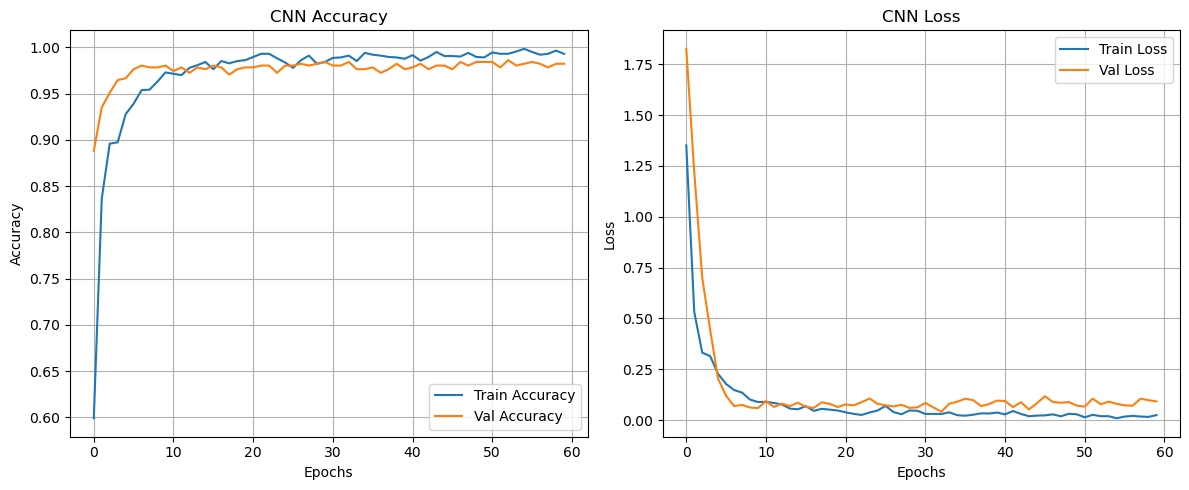

In [11]:
# Step 0: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

# Step 1: Load and clean dataset
df = pd.read_csv('arrhythmia.data', header=None)
df.columns = [f'F{i}' for i in range(1, 280)] + ['class']
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df = df[~df['class'].isin([11, 12, 13])].reset_index(drop=True)

# Step 2: Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Step 3: Separate features and labels
X = df_imputed.drop('class', axis=1).values
y = df_imputed['class'].values

# Step 4: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Feature Selection - Top 89 features with RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
selector = SelectFromModel(rf, max_features=89, prefit=True)
X_selected = selector.transform(X_scaled)
print(f"Selected features shape: {X_selected.shape}")

# Step 6: Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)
print("After SMOTE class distribution:", np.bincount(y_resampled.astype(int)))

# Step 7: Reshape for CNN input
X_cnn = X_resampled.reshape(X_resampled.shape[0], X_resampled.shape[1], 1)

# One-hot encode labels
y_encoded = to_categorical(y_resampled.astype(int) - 1)

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_cnn, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Step 9: Build CNN model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_cnn.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(y_encoded.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Step 10: Train the model (no early stopping)
history = model.fit(
    X_train, y_train,
    epochs=60,
    batch_size=32,
    validation_split=0.2
)

# Step 11: Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Final Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 12: Classification report & Confusion matrix
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true_labels, y_pred_labels))

# Step 13: Plot Accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Step 14: Plot Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
